# Use Cases for MSBA Capstone EDA
## University of Utah - Spring 2024
## Tom Kingston


The MSBA Capstone Exploratory Data Analysis (EDA) project aims to uncover insights from a comprehensive dataset through meticulous exploration, preprocessing, and feature engineering. The project leverages a structured approach to understand the underlying patterns, anomalies, and relationships within the data. Through the integration of external datasets, the project seeks to enrich the analysis, providing a deeper context and enhancing the robustness of the findings. This EDA serves as a step towards predictive modeling and strategic decision-making.


### Load and Explore the Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('FACT_MARKET_DEMAND.csv')

# Display the first few rows of the dataframe
print(data.head())

# Get a summary of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

         DATE  MARKET_KEY CALORIC_SEGMENT            CATEGORY  UNIT_SALES  \
0  2021-08-21         524      DIET/LIGHT                 SSD        69.0   
1  2022-05-07         637         REGULAR                 SSD         4.0   
2  2022-10-22         628      DIET/LIGHT  ING ENHANCED WATER         1.0   
3  2022-08-13         216         REGULAR                 SSD         3.0   
4  2022-01-01         210         REGULAR                 SSD         4.0   

   DOLLAR_SALES MANUFACTURER               BRAND            PACKAGE  \
0        389.74     SWIRE-CC           DIET YAWN  12SMALL 12ONE CUP   
1         30.96        COCOS  GORGEOUS ORANGEOUS  12SMALL 12ONE CUP   
2          2.25       JOLLYS    DIGRESS FLAVORED  20SMALL MULTI JUG   
3          7.55        COCOS         CHERRY FIZZ       1L MULTI JUG   
4         25.96        COCOS           RADIANT'S  12SMALL 12ONE CUP   

                                                ITEM  
0  YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE  DURI...  


### Data Preprocessing

In [3]:
# Handling missing values
data['CALORIC_SEGMENT'].fillna('Unknown', inplace=True)

# Convert DATE column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

### Feture Enginering

In [4]:
# Extracting time-related features
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
data['WeekOfYear'] = data['DATE'].dt.isocalendar().week

# Encoding a categorical 
data = pd.get_dummies(data, columns=['CALORIC_SEGMENT', 'CATEGORY'], drop_first=True)

### Incorporate External Data

In [5]:
# Load the external census data
census_data = pd.read_csv('zip_to_market_unit_mapping.csv')

# Both datasets have a 'MARKET_KEY' column for joining
data = pd.merge(data, census_data, on='MARKET_KEY', how='left')

### EDA

#### Sales Distributions

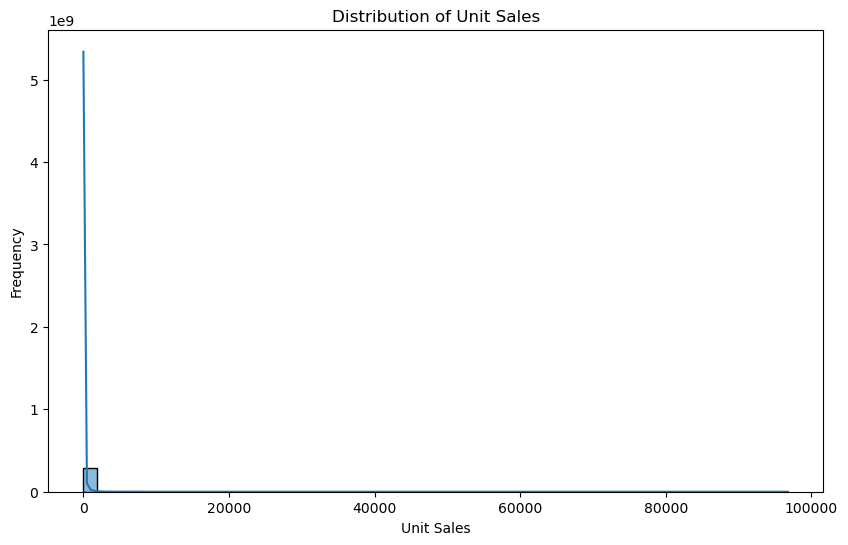

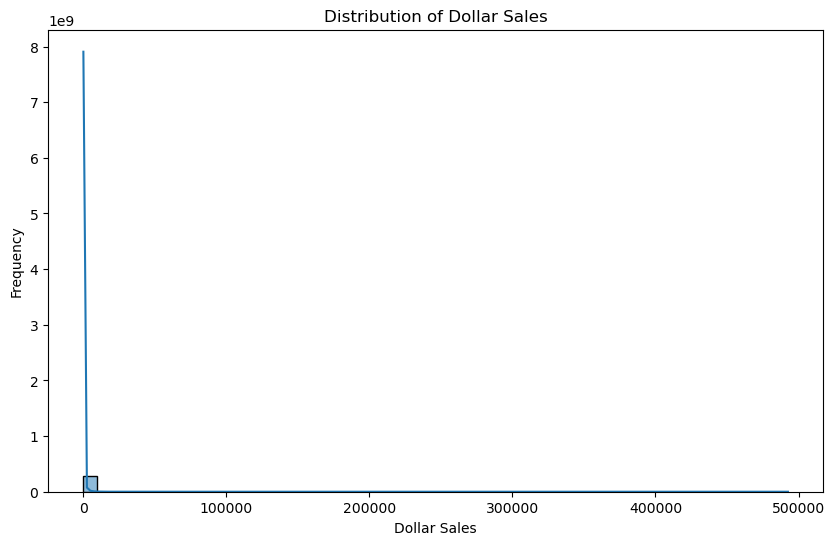

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of UNIT_SALES
plt.figure(figsize=(10, 6))
sns.histplot(data['UNIT_SALES'], bins=50, kde=True)
plt.title('Distribution of Unit Sales')
plt.xlabel('Unit Sales')
plt.ylabel('Frequency')
plt.show()

# Distribution of DOLLAR_SALES
plt.figure(figsize=(10, 6))
sns.histplot(data['DOLLAR_SALES'], bins=50, kde=True)
plt.title('Distribution of Dollar Sales')
plt.xlabel('Dollar Sales')
plt.ylabel('Frequency')
plt.show()

The sales distribution histoplot reveals insights into sales trends and variability across different segments. By analyzing its shape and spread, we can identify patterns such as peak sales periods or popular products, and detect outliers indicating exceptional sales events or data inconsistencies. This visualization aids in understanding customer purchasing behavior, enabling targeted strategies for marketing and product development to enhance overall business performance.

#### Sales Trends Over Time

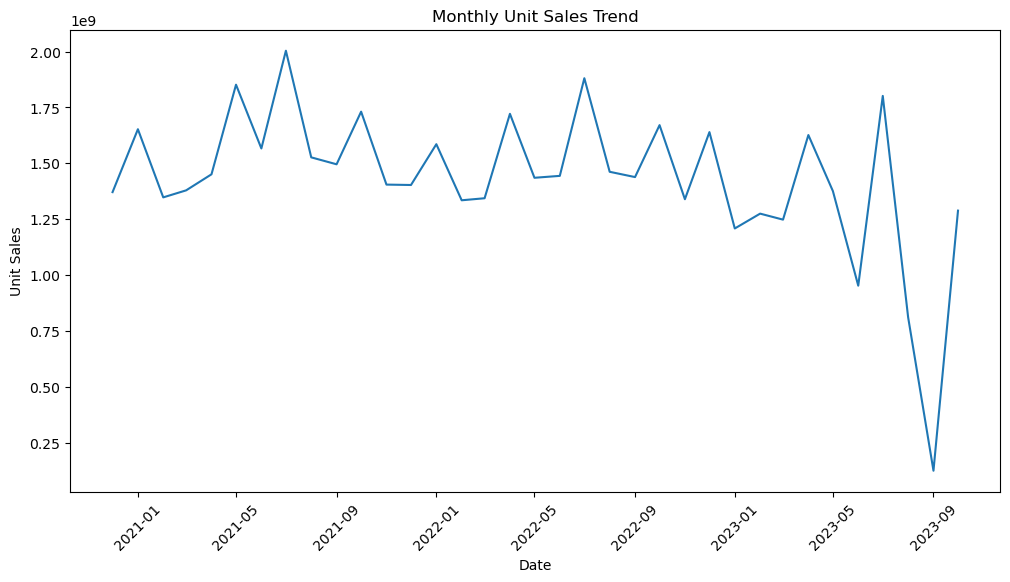

In [7]:
# Aggregate UNIT_SALES by month
monthly_sales = data.groupby(data['DATE'].dt.to_period('M'))['UNIT_SALES'].sum().reset_index()
monthly_sales['DATE'] = monthly_sales['DATE'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='UNIT_SALES', data=monthly_sales)
plt.title('Monthly Unit Sales Trend')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.show()

The Monthly Unit Sales Trend graph offers a clear visualization of sales performance over time, highlighting seasonal variations, trends, and any cyclical patterns present in the data. By observing peaks and troughs, we can pinpoint high-demand periods and potential sales slumps, aiding in inventory and promotional planning. This graph assists in forecasting future sales and also in evaluating the impact of past marketing campaigns and operational decisions on sales outcomes.

#### Analyzing ITEM DOLLAR_SALES by DATE

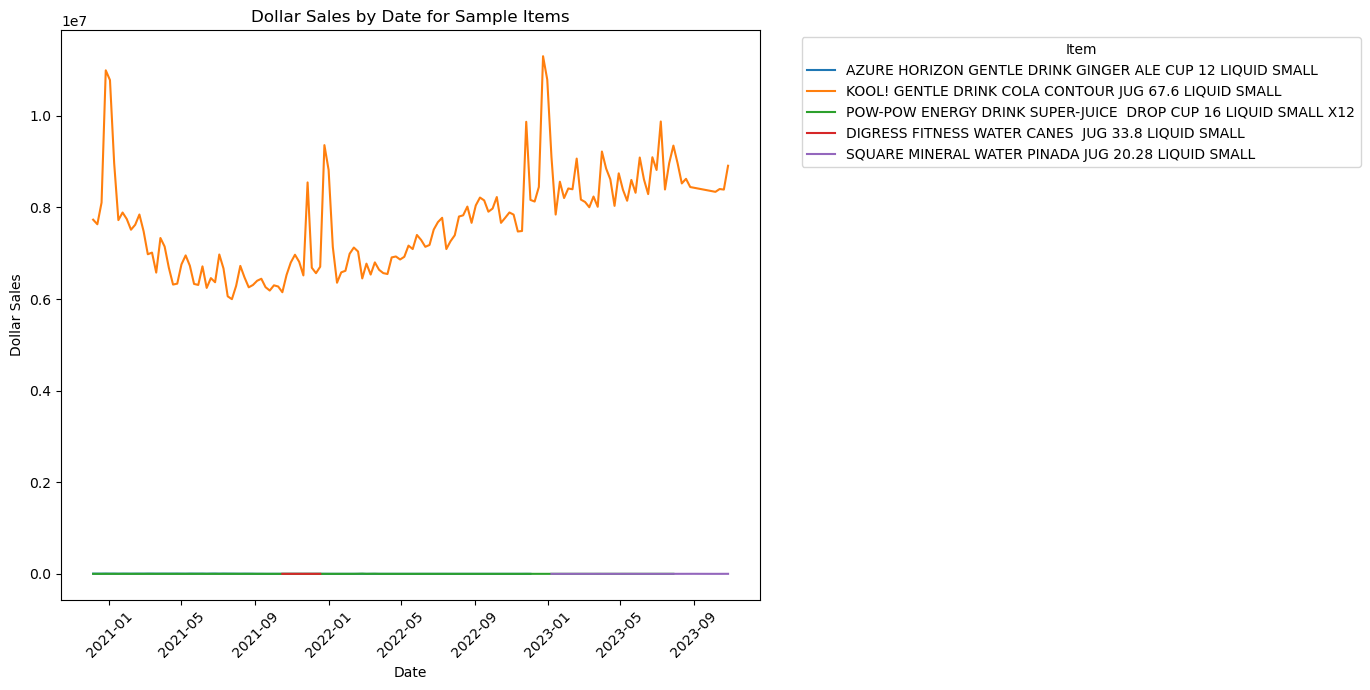

In [16]:
# Convert DATE to datetime 
data['DATE'] = pd.to_datetime(data['DATE'])

# Aggregate DOLLAR_SALES by DATE for each ITEM
item_sales_by_date = data.groupby(['DATE', 'ITEM'])['DOLLAR_SALES'].sum().reset_index()

# Plotting a sample of items to avoid clutter
sample_items = item_sales_by_date['ITEM'].drop_duplicates().sample(5)
filtered_data = item_sales_by_date[item_sales_by_date['ITEM'].isin(sample_items)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='DATE', y='DOLLAR_SALES', hue='ITEM')
plt.title('Dollar Sales by Date for Sample Items')
plt.xlabel('Date')
plt.ylabel('Dollar Sales')
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Dollar Sales by Date for Sample Items graph provides an insightful look at the revenue generated from specific products over time. This visualization enables the identification of sales trends for individual items, including seasonal fluctuations and the impact of marketing initiatives. By comparing the sales trajectories of different items, businesses can discern which products are top performers or may require strategic adjustments. This graph is invaluable for making data-driven decisions in product management, pricing strategies, and promotional planning.

#### Analyzing ITEM DOLLAR_SALES by ZIP_CODE

In [19]:
# Assuming you have a DataFrame item_sales_by_zip and a specific ZIP code
specific_zip_code = '80013'  # Use an actual ZIP code from your dataset

# Filter to get the top 5 selling items in the specific ZIP code
top_items_in_zip = item_sales_by_zip[item_sales_by_zip['ZIP_CODE'] == specific_zip_code].nlargest(5, 'DOLLAR_SALES')

# Check if top_items_in_zip is not empty
if not top_items_in_zip.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_items_in_zip, x='DOLLAR_SALES', y='ITEM')
    plt.title(f'Top 5 Selling Items in ZIP Code {specific_zip_code}')
    plt.xlabel('Dollar Sales')
    plt.ylabel('Item')
    plt.show()
else:
    print(f'No sales data available for ZIP Code {specific_zip_code}.')

No sales data available for ZIP Code 80013.
